In [1]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Load an image
image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_96d4e0eb.jpg"
image = Image.open(image_path)


In [2]:

# Define the transformations
resize_transform = transforms.Resize((256, 256))
rotation_transform = transforms.RandomRotation(degrees=30)
color_jitter_transform = transforms.ColorJitter(brightness=0.5, contrast=0.5)
flip_transform = transforms.RandomHorizontalFlip(p=0.5)
grayscale_transform = transforms.Grayscale(num_output_channels=3)
to_tensor_transform = transforms.ToTensor()
normalize_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Apply and display each transformation
def show_image(image, title, ax):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')


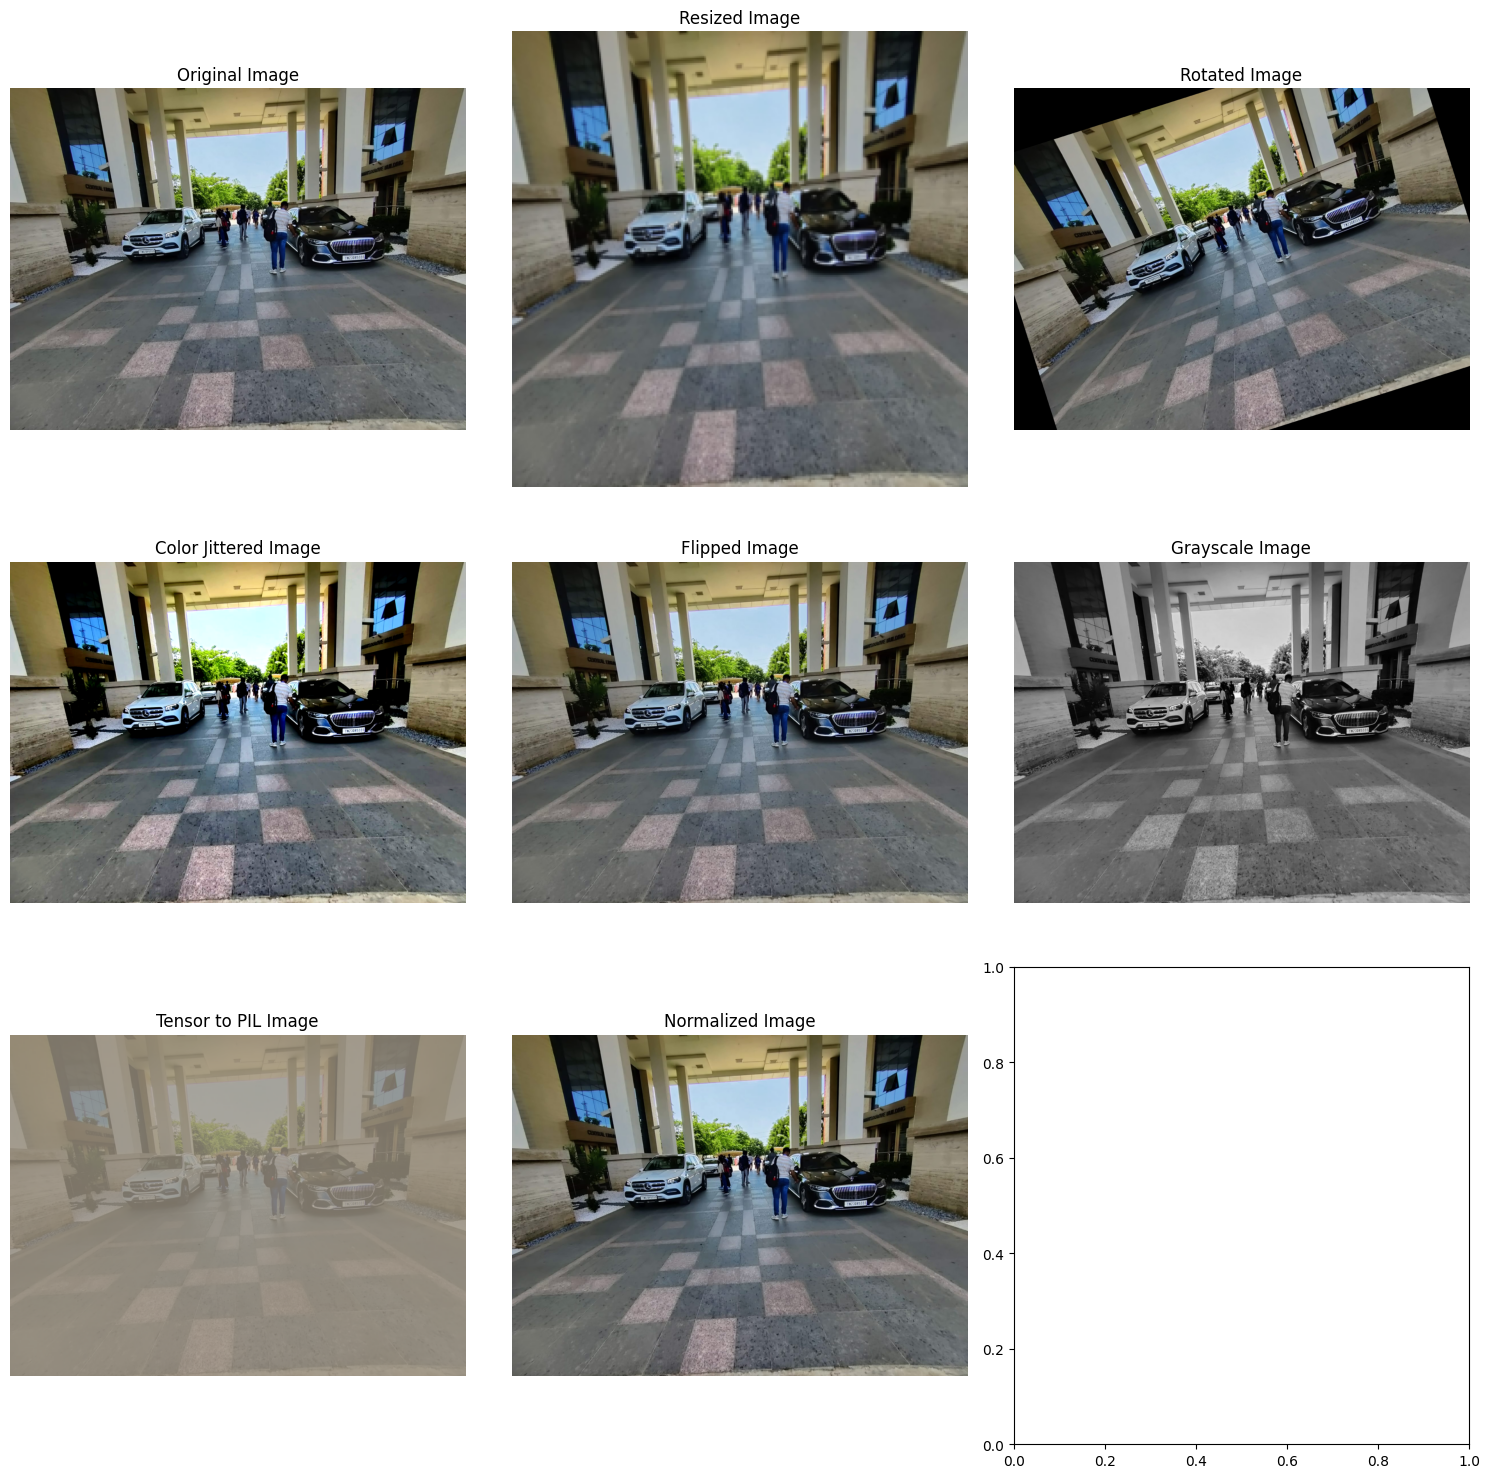

In [3]:

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Original image
show_image(image, 'Original Image', axes[0, 0])

# Resized image
resized_image = resize_transform(image)
show_image(resized_image, 'Resized Image', axes[0, 1])

# Rotated image
rotated_image = rotation_transform(image)
show_image(rotated_image, 'Rotated Image', axes[0, 2])

# Color Jittered image
color_jittered_image = color_jitter_transform(image)
show_image(color_jittered_image, 'Color Jittered Image', axes[1, 0])

# Flipped image
flipped_image = flip_transform(image)
show_image(flipped_image, 'Flipped Image', axes[1, 1])

# Grayscale image
grayscale_image = grayscale_transform(image)
show_image(grayscale_image, 'Grayscale Image', axes[1, 2])

# Tensor image (converted to PIL for display)
tensor_image = to_tensor_transform(image)
inverse_transform = transforms.Compose([
    transforms.Normalize(mean=[0, 0, 0], std=[1/0.229, 1/0.224, 1/0.225]),
    transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
    transforms.ToPILImage()
])
tensor_image_pil = inverse_transform(tensor_image)
show_image(tensor_image_pil, 'Tensor to PIL Image', axes[2, 0])

# Normalized image (converted to PIL for display)
normalized_image = normalize_transform(to_tensor_transform(image))
inverse_transform = transforms.Compose([
    transforms.Normalize(mean=[0, 0, 0], std=[1/0.229, 1/0.224, 1/0.225]),
    transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
    transforms.ToPILImage()
])
normalized_image_pil = inverse_transform(normalized_image)
show_image(normalized_image_pil, 'Normalized Image', axes[2, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()
